# <b>Question 1</b>

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
import time
import sortedcontainers
import copy
%matplotlib inline

## <b>Part 1</b>

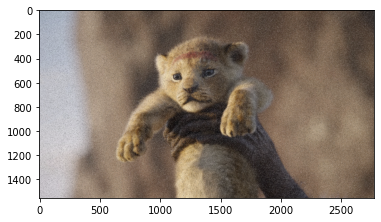

In [2]:
simba = cv2.imread("../images/NoisySimba.png")
simbaRGB = cv2.cvtColor(simba,cv2.COLOR_BGR2RGB)
plt.imshow(simbaRGB,cmap='gray')

In [3]:
def padding(img,k):
    padNum = math.floor(k/2)
    imgP = np.zeros((img.shape[0]+(2*padNum),img.shape[1]+(2*padNum)))
#     print(imgP.shape)
    imgP[padNum:imgP.shape[0]-padNum, padNum:imgP.shape[1]-padNum] = img
    xStart = padNum
    xEnd = imgP.shape[0]-padNum
    yStart = padNum
    yEnd = imgP.shape[1]-padNum
#     print(img.shape)
    imgP[xStart:xEnd, yStart:yEnd] = img
    return imgP

In [4]:
def medFilt(img, k):
    img_b = img[:,:,0].astype('uint8')
    img_g = img[:,:,1].astype('uint8')
    img_r = img[:,:,2].astype('uint8')
    res = np.zeros(img.shape)
    for q in range(3):
        imgP = padding(img[:,:,q].astype('uint8'),k)
        print(q)
        preCompRow = sortedcontainers.SortedList()
        preCompCol = sortedcontainers.SortedList()
        padNum = k//2
        r0 = imgP.shape[0]
        c0 = imgP.shape[1]
        xS = padNum
        xE = r0 - padNum
        yS = padNum
        yE = c0 - padNum
        out = np.copy(imgP)
        for i in range(xS,xE):
            # 2 cases: 1) Initial values 2) Precompute for rows
            #Standard
            if i!=xS:
                #Remove upper most rows and iterate through columns
                for l in imgP[i-(padNum+1),0:k]:
                    preCompRow.discard(l)
                #Add the next lower row
                for l in imgP[i+padNum,0:k]:
                    preCompRow.add(l)
            #Initialisation for the first kernel to be used for next vals
            else:
                for l in range(k):
                    for m in range(k):
                        preCompRow.add(imgP[l,m])

            for j in range(yS,yE):
                if(j==padNum):
                    preCompCol = copy.deepcopy(preCompRow)
                else:
                    for l in imgP[i-padNum:i+padNum+1,j-padNum-1]:
                        preCompCol.discard(l)
                    for l in imgP[i-padNum:i+padNum+1,j+padNum]:
                        preCompCol.add(l)
                out[i][j] = preCompCol[(int)((k**2)/2)]
        out = out[xS:xE, yS:yE] 
        res[:,:,2-q] = out.astype('uint8')
    
#     res = np.zeros(simba.shape)
#     res[:,:,2] = B_med.astype('uint8')
#     res[:,:,1] = G_med.astype('uint8')
#     res[:,:,0] = R_med.astype('uint8')
    print(res.shape)
    return res.astype('uint8')

In [5]:
out = medFilt(simba,5)

0
1
2
(1554, 2774, 3)


Text(0.5, 1.0, 'Noiseless')

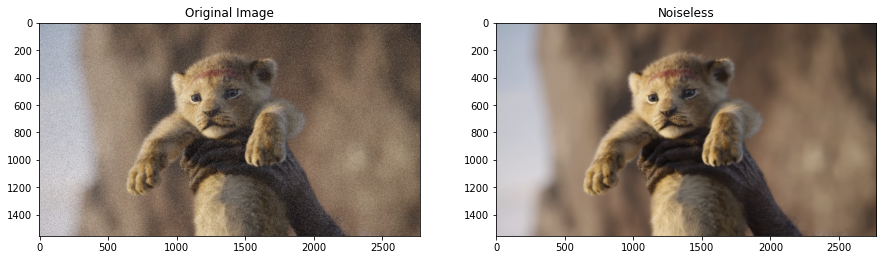

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(15,15))
ax[0].imshow(simbaRGB)
ax[0].set_title("Original Image")
ax[1].imshow(out)
ax[1].set_title("Noiseless")

## <b>Part 2</b>

In [8]:
def linContrastStretching(img,a,b):
    res = np.zeros(img.shape)
    for i in range(3):
        temp = np.copy(img[:,:,i].astype('uint8'))
        aMax = np.amax(temp, axis=None)
        aMin = np.amin(temp, axis=None)
        imgContrast = np.round(((((temp - aMin)/(aMax - aMin)) * (b-a)) + a),decimals=0).astype(np.uint8)
        res[:,:,2-i] = imgContrast.astype('uint8')
    return res.astype('uint8')

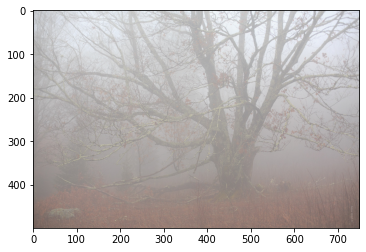

In [9]:
fog = cv2.imread("../images/fog.jpeg")
fogRGB = cv2.cvtColor(fog,cv2.COLOR_BGR2RGB)
plt.imshow(fogRGB)

In [14]:
out = linContrastStretching(fog,0,255)

Text(0.5, 1.0, 'Color Linear Contrast Stretching ')

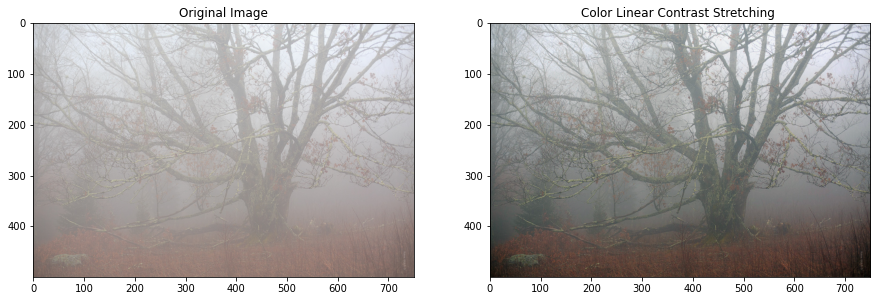

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(15,15))
ax[0].imshow(fogRGB)
ax[0].set_title("Original Image")
ax[1].imshow(out)
ax[1].set_title("Color Linear Contrast Stretching ")

## <b>Part 3</b>

In [16]:
def histEqualization(img):
    res = np.zeros(img.shape)
    for j in range(3):
        temp = img[:,:,j].astype('uint8')
        histogram = np.zeros((256,), dtype=int)
        #print(histogram.shape)
        flatten = np.ravel(temp)
        for i in flatten:
            histogram[i] += 1
        # print(histogram)
        TotalPixels = np.sum(histogram)
        # print(TotalPixels)
        # Find CDF
        for i in range(255):
            histogram[i+1] += histogram[i]

        histogramNorm = (histogram - histogram.min())*255
        Max = TotalPixels - histogram.min()
        histI = (histogramNorm/Max).astype('uint8')

        for row in range(temp.shape[0]):
            for col in range(temp.shape[1]):
                temp[row][col] = histI[temp[row][col]]
        res[:,:,2-j] = temp.astype('uint8')
        
    return res.astype('uint8')
#     plt.imshow(src,cmap='gray')
#     cv2.imwrite("MarauderEqualise.jpg", src)

In [17]:
out = histEqualization(fog)

Text(0.5, 1.0, 'Hisogram Equalisation')

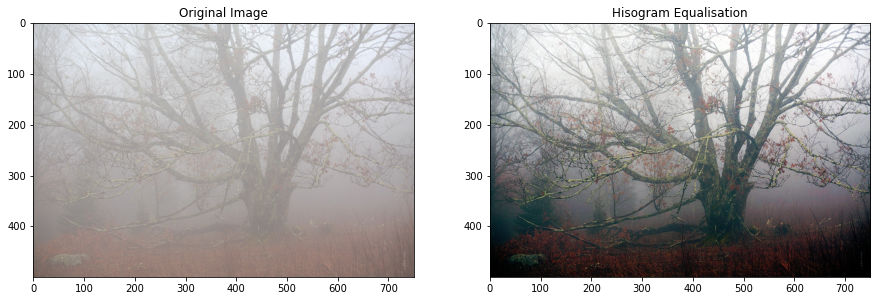

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(15,15))
ax[0].imshow(fogRGB)
ax[0].set_title("Original Image")
ax[1].imshow(out)
ax[1].set_title("Hisogram Equalisation")

## <b>Part 4</b>

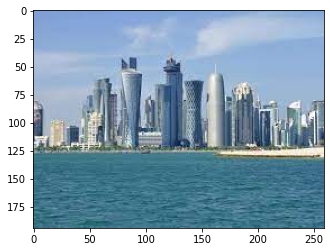

In [23]:
city = cv2.imread("../images/city.jpeg")
cityRGB = cv2.cvtColor(city,cv2.COLOR_BGR2RGB)
plt.imshow(cityRGB,cmap='gray')

In [24]:
city_b = city[:,:,0].astype('double')
city_g = city[:,:,1].astype('double')
city_r = city[:,:,2].astype('double')

In [25]:
#Vintage Effect
vinR = (city_r * 0.293) + (city_g *0.769) + (city_b * 0.210);
vinG = (city_r * 0.249) + (city_g *0.686) + (city_b * 0.188);
vinB = (city_r * 0.172) + (city_g *0.534) + (city_b * 0.151);

In [31]:
out = np.zeros(city.shape,dtype='int')
out[:,:,2] = vinB.astype('int')
out[:,:,1] = vinG.astype('int')
out[:,:,0] = vinR.astype('int')
out = np.copy(out.astype('int'))
out[out>255] = 255

Text(0.5, 1.0, 'Vintage Effect')

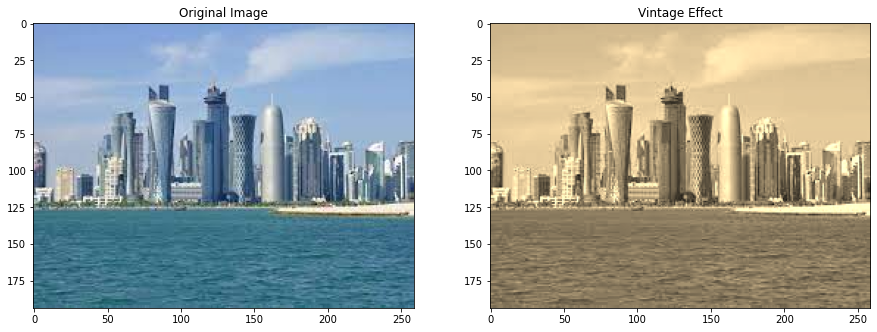

In [33]:
fig, ax = plt.subplots(1, 2, figsize=(15,15))
ax[0].imshow(cityRGB,cmap='gray')
ax[0].set_title("Original Image")
ax[1].imshow(out,cmap='gray')
ax[1].set_title("Vintage Effect")

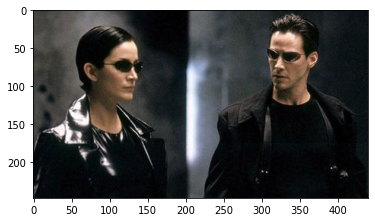

In [34]:
mat = cv2.imread("../images/matrix.jpg")
matRGB = cv2.cvtColor(mat,cv2.COLOR_BGR2RGB)
plt.imshow(matRGB)

In [35]:
mat_b = mat[:,:,0].astype('double')/255
mat_g = mat[:,:,1].astype('double')/255
mat_r = mat[:,:,2].astype('double')/255

In [36]:
#Vintage Effect
matR = (mat_r**(1.5))
matG = (mat_g**(0.8))
matB = (mat_b**(1.5))

In [37]:
print(matR)
print(mat_r)

[[0.15317011 0.15003358 0.1438258  ... 0.0089594  0.0089594  0.01020849]
 [0.15003358 0.15003358 0.15003358 ... 0.00663061 0.0089594  0.01151078]
 [0.14075485 0.14691876 0.14691876 ... 0.0055568  0.0089594  0.01151078]
 ...
 [0.10291336 0.0947553  0.02363299 ... 0.0006946  0.00127606 0.00127606]
 [0.11699963 0.06924564 0.00360925 ... 0.00024558 0.0006946  0.0006946 ]
 [0.13467964 0.06684419 0.         ... 0.00127606 0.0006946  0.0006946 ]]
[[0.28627451 0.28235294 0.2745098  ... 0.04313725 0.04313725 0.04705882]
 [0.28235294 0.28235294 0.28235294 ... 0.03529412 0.04313725 0.05098039]
 [0.27058824 0.27843137 0.27843137 ... 0.03137255 0.04313725 0.05098039]
 ...
 [0.21960784 0.20784314 0.08235294 ... 0.00784314 0.01176471 0.01176471]
 [0.23921569 0.16862745 0.02352941 ... 0.00392157 0.00784314 0.00784314]
 [0.2627451  0.16470588 0.         ... 0.01176471 0.00784314 0.00784314]]


In [38]:
out = np.zeros(mat.shape)
out[:,:,2] = matB*255
out[:,:,1] = matG*255
out[:,:,0] = matR*255

In [39]:
out = np.copy(out.astype('uint8'))

Text(0.5, 1.0, 'Matrix Effect')

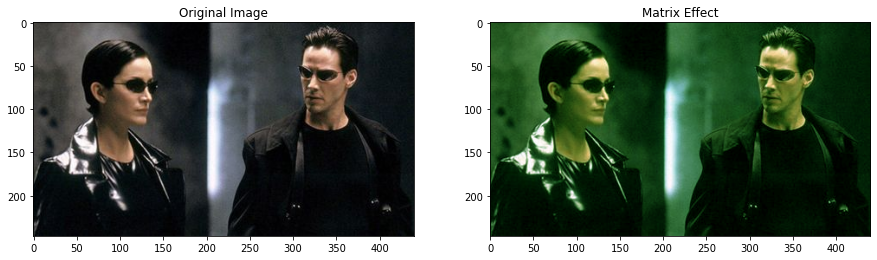

In [40]:
fig, ax = plt.subplots(1, 2, figsize=(15,15))
ax[0].imshow(matRGB)
ax[0].set_title("Original Image")
ax[1].imshow(out)
ax[1].set_title("Matrix Effect")

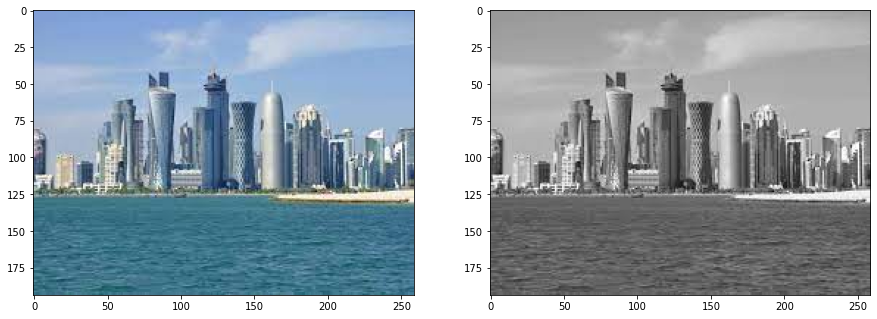

In [14]:
city = cv2.imread("../images/city.jpeg")
cityRGB = cv2.cvtColor(city,cv2.COLOR_BGR2RGB)
cityG = cv2.cvtColor(city,cv2.COLOR_BGR2GRAY)
fig, ax = plt.subplots(1, 2, figsize=(15,15))
ax[0].imshow(cityRGB)
ax[1].imshow(cityG,cmap='gray')

In [16]:
city_b = city[:,:,0].astype('double')/255
city_g = city[:,:,1].astype('double')/255
city_r = city[:,:,2].astype('double')/255

In [23]:
city = np.array(city)
r = city.shape[0]
c = city.shape[1]
print(r,c)

194 259


In [24]:
middleR = r//2 
middleC = c//2

In [31]:
out = np.zeros((r,c))

In [32]:
for i in range(r):
    for j in range(c):
        out[i,j] = math.sqrt((i-middleR)**2 + (j-middleC)**2)


In [ ]:
out = out / np.max(out);
out = 1 - out;

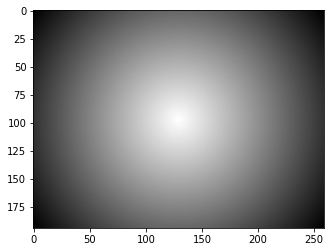

In [35]:
plt.imshow(out,cmap='gray')

In [57]:
out1 = np.copy(city)
out1 = city.astype('double')

In [58]:
out1[:,:,0] = out1[:,:,0]*out
out1[:,:,1] = out1[:,:,1]*out
out1[:,:,2] = out1[:,:,2]*out
out1 = out1.astype('uint8')

In [59]:
out1 = cv2.cvtColor(out1,cv2.COLOR_BGR2RGB)

Text(0.5, 1.0, 'Vignetting Effect')

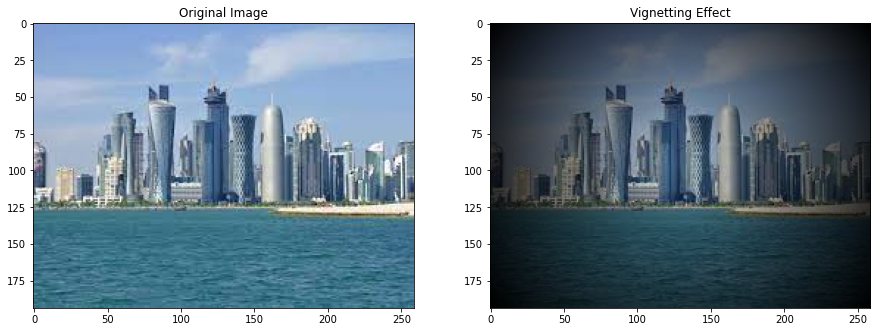

In [60]:
fig, ax = plt.subplots(1, 2, figsize=(15,15))
ax[0].imshow(cityRGB)
ax[0].set_title("Original Image")
ax[1].imshow(out1)
ax[1].set_title("Vignetting Effect")

In [40]:
city = cv2.imread("../images/city.jpeg")
cityRGB = cv2.cvtColor(city,cv2.COLOR_BGR2RGB)

In [41]:
#Blue
outB = cityRGB.copy()
outB[:,:,0] = 0
outB[:,:,1] = 0
outG = cityRGB.copy()
outG[:,:,0] = 0
outG[:,:,2] = 0
outR = cityRGB.copy()
outR[:,:,1] = 0
outR[:,:,2] = 0

In [42]:
listIt = []
for i in range(256):
    val = i**1.105
    listIt.append(val)
listIt = np.array(listIt)
listIt[listIt>255] = 255
listIt = listIt.astype('uint8')
# print(listIt)
vals = cv2.LUT(outB[:,:,2],listIt)
# print(vals)
outB[:,:,2] = vals


vals = cv2.LUT(outG[:,:,1],listIt)
# print(vals)
outG[:,:,1] = vals

vals = cv2.LUT(outR[:,:,0],listIt)
# print(vals)
outR[:,:,0] = vals

Text(0.5, 1.0, 'DuoTone Green Effect')

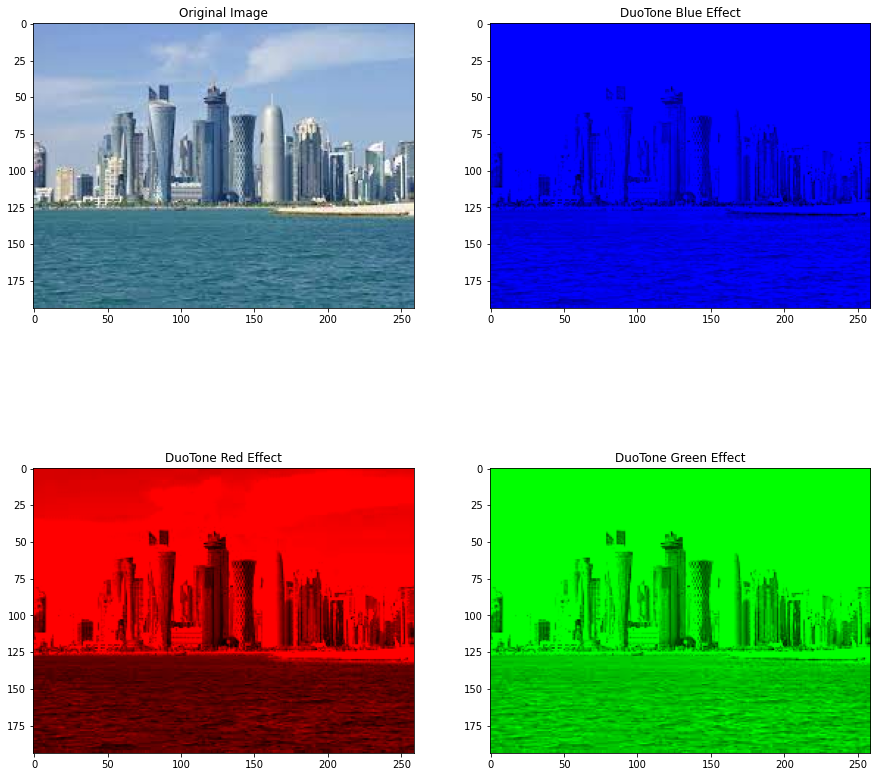

In [43]:
fig, ax = plt.subplots(2, 2, figsize=(15,15))
ax[0][0].imshow(cityRGB)
ax[0][0].set_title("Original Image")
ax[0][1].imshow(outB)
ax[0][1].set_title("DuoTone Blue Effect")
ax[1][0].imshow(outR)
ax[1][0].set_title("DuoTone Red Effect")
ax[1][1].imshow(outG)
ax[1][1].set_title("DuoTone Green Effect")